In [1]:
import numpy as np
import scipy as sp
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as sps
import pandas as pd
import ipywidgets as widgets

import random
import math

import itertools

%matplotlib inline

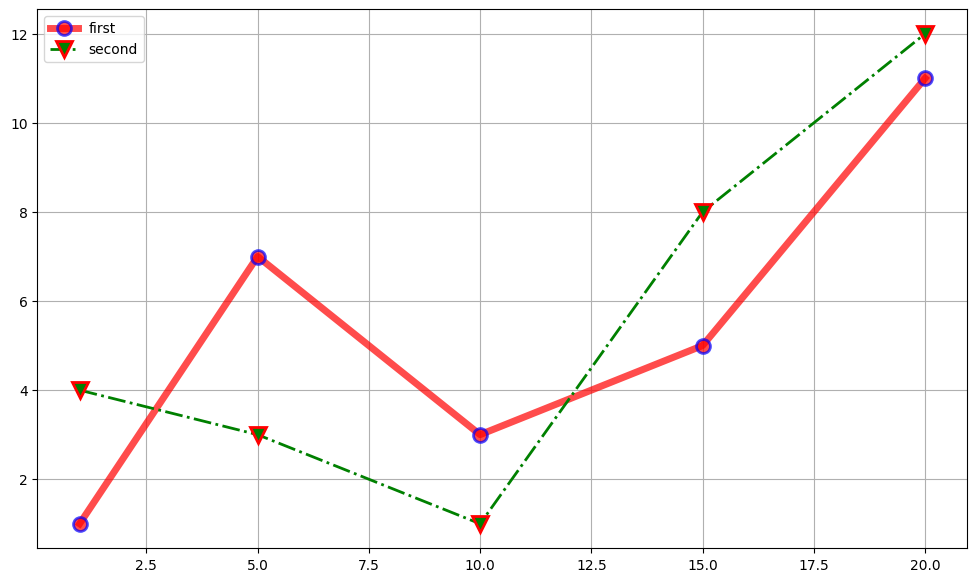

In [3]:
#вот вам сигнатурки на plot

#plot([x], y, [fmt], *, data=None, **kwargs)
#plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

#ниже повторяю базу из 2 главы

x = [1, 5, 10, 15, 20]
y1 = [1, 7, 3, 5, 11]
y2 = [4, 3, 1, 8, 12]
plt.figure(figsize=(12, 7))
plt.plot(x, y1, 'o-r', alpha=0.7, label='first', lw=5, mec='b', mew=2,
ms=10)
plt.plot(x, y2, 'v-.g', label='second', mec='r', lw=2, mew=2, ms=12)
plt.legend()
plt.grid(True)

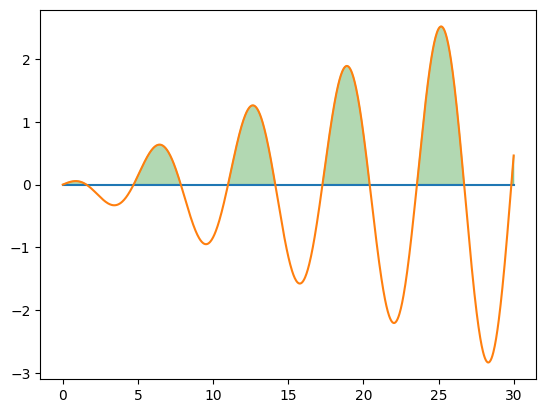

In [47]:
#Можно закрашивать место между двумя графиками
x = np.linspace(0,30, 1000)
y = np.array([0. for i in range(0,1000)])
y2 = np.cos(x) * x / 10.
plt.plot(x,y,x,y2)
plt.fill_between(x, y, y2=y2, where=(y<y2), color='g', alpha=0.3)

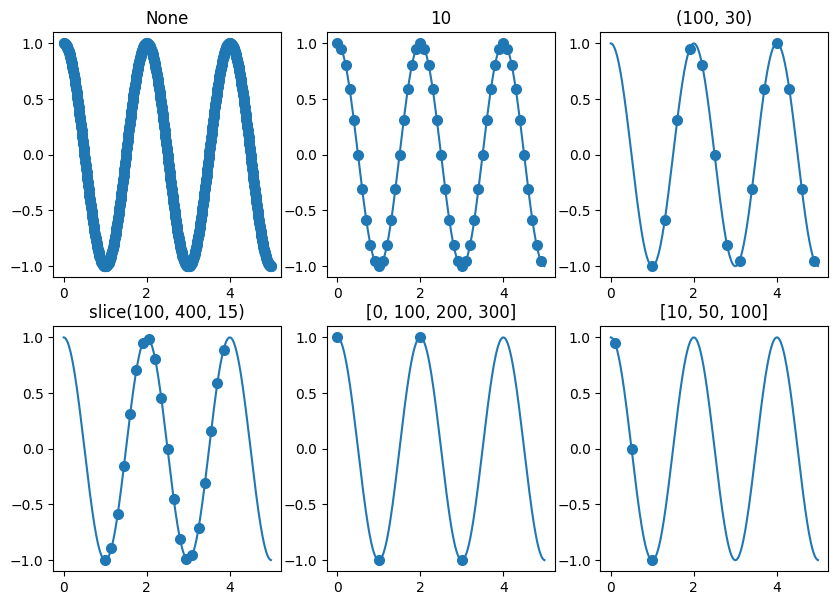

In [49]:
#теперь точки и линию можно объединить, просто указав, что точки это маркер
x = np.arange(0.0, 5, 0.01)
y = np.cos(x*np.pi)
m_ev_case = [None, 10, (100, 30), slice(100,400,15), [0, 100, 200, 300], [10, 50, 100]]
fig, ax = plt.subplots(2, 3, figsize=(10, 7))
axs = [ax[i, j] for i in range(2) for j in range(3)]
for i, case in enumerate(m_ev_case):
    axs[i].set_title(str(case))
    axs[i].plot(x, y, 'o', ls='-', ms=7, markevery=case)

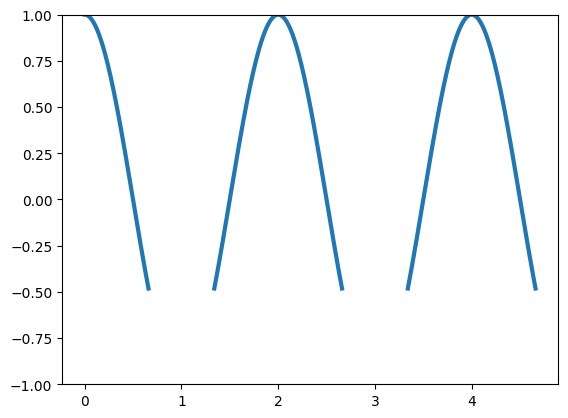

In [50]:
x = np.arange(0.0, 5, 0.01)
y = np.cos(x*np.pi)
y_masked = np.ma.masked_where(y < -0.5, y)
plt.ylim(-1, 1)
plt.plot(x, y_masked, linewidth=3)

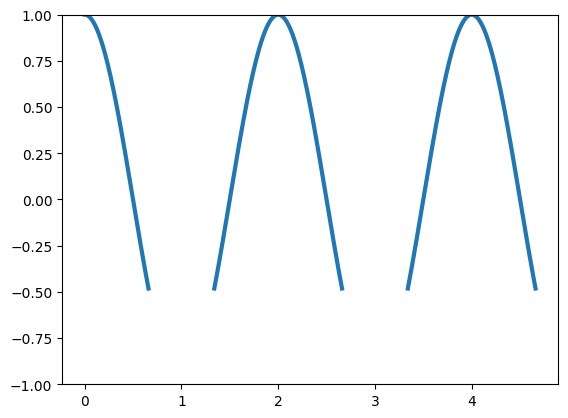

In [51]:
#можно масштабировать и обрезать график с помощью xlim и ylim
x = np.arange(0.0, 5, 0.01)
y = np.cos(x*np.pi)
y_masked = np.ma.masked_where(y < -0.5, y)
plt.ylim(-1, 1)
plt.plot(x, y_masked, linewidth=3)

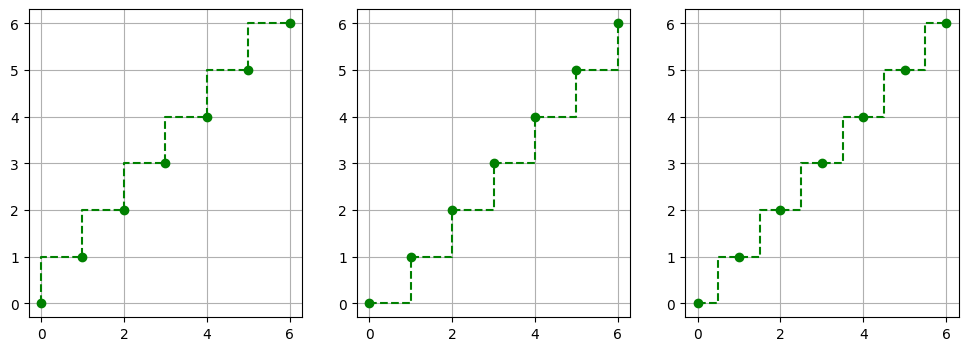

In [59]:
#ступенчатый график, для функции распределения дискретной самое то
x = np.arange(0, 7)
y = x
where_set = ['pre', 'post', 'mid']
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i, ax in enumerate(axs):
    ax.step(x, y, 'g--o', where=where_set[i])
    ax.grid()

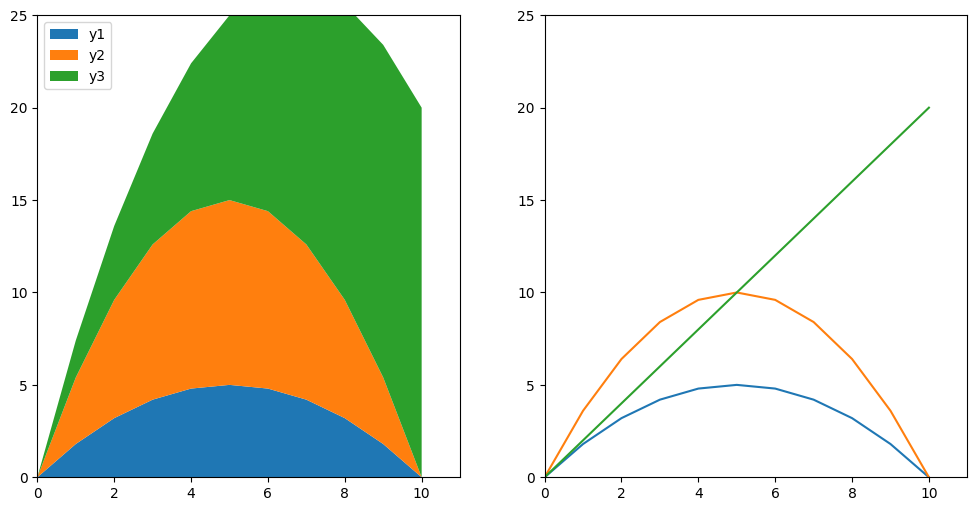

In [67]:
#Стековый график, суммирует (сумма предыдущего и текущего графика, первый без изменений)
x = np.arange(0, 11, 1)
y1 = np.array([(-0.2)*i**2+2*i for i in x])
y2 = np.array([(-0.4)*i**2+4*i for i in x])
y3 = np.array([2*i for i in x])
labels = ['y1', 'y2', 'y3']
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2)
fig.add_subplot(gs[0, 0])
plt.xlim(0,11)
plt.ylim(0,25)
plt.stackplot(x, y1, y2, y3, labels=labels)
plt.legend(loc='upper left')
fig.add_subplot(gs[0, 1])
plt.xlim(0,11)
plt.ylim(0,25)
plt.plot(x,y1,x,y2,x,y3)

<StemContainer object of 3 artists>

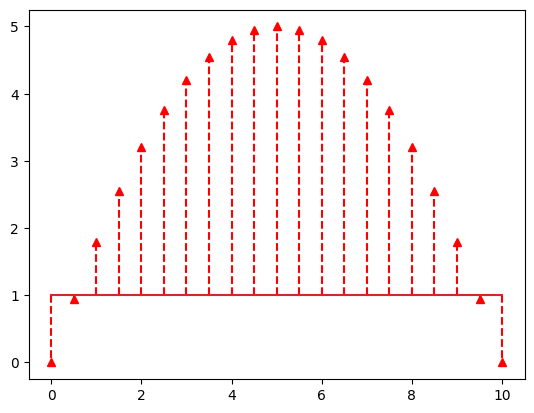

In [68]:
x = np.arange(0, 10.5, 0.5)
y = np.array([(-0.2)*i**2+2*i for i in x])
plt.stem(x, y, linefmt='r--', markerfmt='^', bottom=1)
#kinda funny, not interested

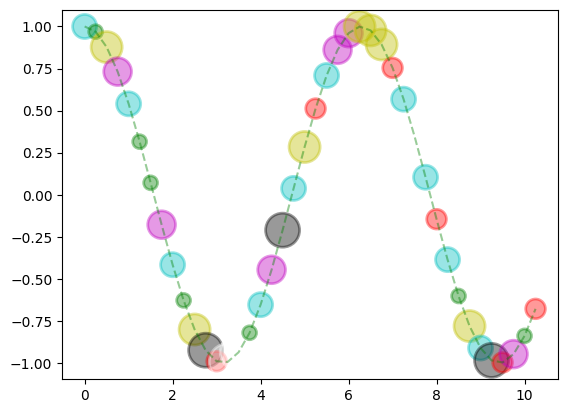

In [88]:
import matplotlib.colors as mcolors
bc = mcolors.BASE_COLORS
x = np.arange(0, 10.5, 0.25)
y = np.cos(x)
num_set = np.random.randint(1, len(mcolors.BASE_COLORS), len(x))
sizes = num_set * 100
colors = [list(bc.keys())[i] for i in num_set]
plt.scatter(x, y, s=sizes, alpha=0.4, c=colors, linewidths=2,
edgecolors='face')
plt.plot(x, y, 'g--', alpha=0.4)
#смешные точки нахреначить не plot, а scatter